# Final Exam PHYS248/MATH248
**Saturday April 14th, 2018, 9am - 12pm (3 hrs)**

You are free to use all the course resources, as well as internet sources such as Python documentation web-pages and web search results. You must not have any communications by any means with people, other than the exam invigilators. 

If not explicitly stated otherwise, you are free to choose whichever library to use, including your own modules.  If you do use your own module, include it in your final exam directory.

Save your final exam (early and often!) in your Bitbucket repository, in `mp248/final/final.ipynb`.

Please include any other files or modules you will need to make your i-python notebook run in the `mp248/final` directory.

* * *

# Run these cells in order

matplotlib nbagg is used for problem 4 dealing with the interactive plot. None of the other problems require interactivity so I just left them as normal plt.plot() calls. Using nbagg will send plots to the very last plot (in the little radio box, it actually looks pretty funny).

Running everything in order and leaving the nbagg to the very end will result in the graphs being outputted correctly.

## Problem 1

### 1.1
In the `Quizzes_Assignments_Exams` directory you will find a file `sunspots.txt` which contains the observed number of sunspots for each month since 1749. Copy that file into the `final` directory of your repo and commit it along with the other file(s) to your repository. The file contains two columns with the month number and the sunspot number.

Read the data and make a graph as a function of time.  The arrays for month and number of sunspots are to be called `month` and `nr_sunsp`. Determine how many data point pairs are in the data set and print that number out embedded in a complete and formatted sentence.

Create down sampled data sets `month_sparse` and `nr_sunsp_sparse` by retaining only every $15^\mathrm{th}$ data pair. In other words, keep the first data pair, then skip 14, then keep the 15th, and so on.

Plot both the down-sampled data set and the original data set for month 900 to 1700.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

There are 3143 data points.


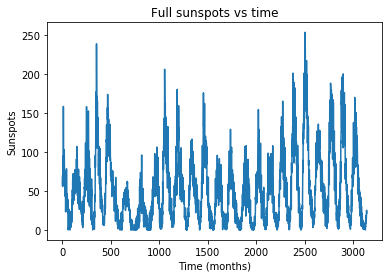

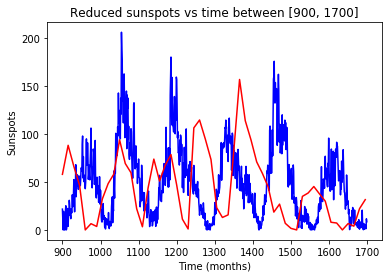

In [2]:
f = open("sunspots.txt", "r")
months = []
nr_sunsp = []
month_sparse = []
nr_sunsp_sparse = []
count = 0
for line in f:
    month, spot = line.split("\t")
    month = float(month)
    spot = float(spot.rstrip())
    months.append(month)
    nr_sunsp.append(spot)
    if count % 15 == 0:
        month_sparse.append(month)
        nr_sunsp_sparse.append(spot)
    count += 1

print("There are %d data points." % count)
    
plt.plot(months, nr_sunsp, '')
plt.title("Full sunspots vs time")
plt.xlabel("Time (months)")
plt.ylabel("Sunspots")
plt.figure()
new_month = []
new_sun = []

# find only months between 900:1700 from the downsampled lists
for i, month in enumerate(months[900:1700]):
    if month in month_sparse:
        new_month.append(month)
        new_sun.append(nr_sunsp[i])


plt.plot(months[900:1700], nr_sunsp[900:1700], 'b')
plt.plot(new_month, new_sun, 'r')
plt.title("Reduced sunspots vs time between [900, 1700]")
plt.xlabel("Time (months)")
plt.ylabel("Sunspots")

### 1.2
Plot a histogram of the number of all sunspots with 10 bins. This shows the number times the measured number of sunspots is in each of the 10 sunspot number bins. Extract the data points of the distribution function and overplot with single dots. Make sure that these dots are properly centered for each bin.

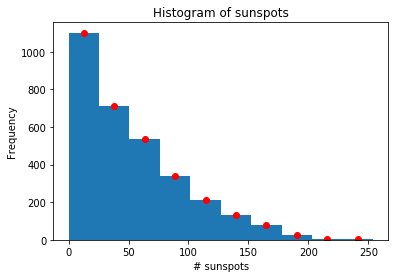

In [3]:
plt.close()
n, bins, patched = plt.hist(nr_sunsp, bins=10)
x = bins[1:]-(bins[1]-bins[0])/2
y = n
plt.plot(x, y, 'ro')
plt.title("Histogram of sunspots")
plt.xlabel("# sunspots")
plt.ylabel("Frequency")
plt.show()

### 1.3
Fit the sunspot distribution function. Perform a least-square fit of an exponential with three parameters
$$
P_\mathrm{spots}(x) = a e^{bx} +c
$$
where $x=N_\mathrm{spots}$ is the number of sunspots measured.

Plot the distribution function data and fit together. Round the fit parameters appropriately and write your final fit formula in a Markdown cell. 

In [4]:
from scipy.optimize import curve_fit

In [5]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

a, p = curve_fit(func, x, y)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


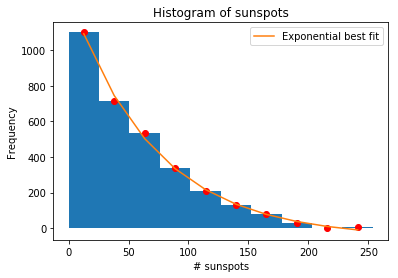

In [6]:
n, bins, patched = plt.hist(nr_sunsp, bins=10)
x = bins[1:]-(bins[1]-bins[0])/2
y = n
plt.plot(x, y, 'ro')
plt.plot(x, a[0]*np.exp(-a[1]*x)+a[2], label='Exponential best fit')


plt.title("Histogram of sunspots")
plt.xlabel("# sunspots")
plt.ylabel("Frequency")
plt.legend()

The final formula follows:
$$
P_\mathrm{spots}(x) = 1372.98 e^{-0.014x} - 54.42
$$

## Problem 2

### 2.1
Write a function that takes as input a positive integer $k$, and uses Sympy to compute the degree $k$ Taylor polynomial for the function $y(x) = sin(x^2)$, centred at $x_0 = 0$, i.e. $T_k(x) = \sum_{i=0}^k\frac{d^i y}{dx^i}(x=0)  \frac{x^i}{i!}$.  Print the output using a Sympy *pprint* command, for $k=2,6,10,14,15$.

### 2.2
Write a function that takes as input a positive integer $k$, and uses Sympy to compute the degree $k$ polynomial *best fit* to $y(x) = sin(x^2)$ on the interval $[0,2\pi]$, using the least-squares technique. As in part 2.1, output your answers for $k=2,6,10,14,15$.

### 2.3
Write a function that takes as input a positive integer $k$.  Plot the function $y(x)=sin(x^2)$, together with the corresponding function from 2.1 and 2.2.  Include a legend.  For your $x$-bounds use the interval $[0, 2\pi]$, for the $y$-bounds use $[-1.2,1.2]$. Label your axis and give your plot an appropriate title (depending on $k$).  Include the plot for $k=10$ in your notebook. 

In [7]:
import sympy as sp
from math import factorial

In [8]:
def taylor(k):
    x = sp.Symbol('x')
    f = sp.sin(x**2)
    F = sp.lambdify(x, f)
    
    # first term is just f(0)
    tay = F(0)
    for i in range(1, k+1):
        f = sp.diff(f, x)
        # sp.pprint(f)
        it = sp.lambdify(x, f)
        # print(it(0))
        tay = tay + it(0) * x**i/factorial(i)
    return tay

for k in [2,6,10,14,15]:
    sp.pprint(taylor(k))
    print('\n\n')

     2
1.0⋅x 



                     6        2
- 0.166666666666667⋅x  + 1.0⋅x 



                     10                      6        2
0.00833333333333333⋅x   - 0.166666666666667⋅x  + 1.0⋅x 



                        14                        10                      6   
- 0.000198412698412698⋅x   + 0.00833333333333333⋅x   - 0.166666666666667⋅x  + 

     2
1.0⋅x 



                        14                        10                      6   
- 0.000198412698412698⋅x   + 0.00833333333333333⋅x   - 0.166666666666667⋅x  + 

     2
1.0⋅x 





In [9]:
def fit(k):
    x = np.linspace(0, 2*np.pi, 1000)
    y = np.sin(x**2)
    cofs = np.polyfit(x, y, k)
    z = sp.Symbol("z")
    eq = round(cofs[-1], 3)
    for i in range(1, k+1):
        eq += round(cofs[i], 3) * z**i
    
    return eq
        
for k in [2,6,10,14,15]:
    sp.pprint(fit(k))
    print('\n\n')

      2                 
0.49⋅z  - 0.235⋅z + 0.49



         6         5          4          3          2                  
- 0.519⋅z  + 3.73⋅z  - 3.849⋅z  + 1.521⋅z  - 0.267⋅z  + 0.019⋅z - 0.519



       10          9           8          7          6          5          4  
0.276⋅z   - 3.823⋅z  + 11.029⋅z  - 5.154⋅z  - 6.689⋅z  + 8.406⋅z  - 3.997⋅z  +

        3          2                  
 1.016⋅z  - 0.146⋅z  + 0.011⋅z + 0.276



       14           13            12            11             10             
0.578⋅z   - 21.762⋅z   + 192.527⋅z   - 714.172⋅z   + 1421.658⋅z   - 1705.105⋅z

9             8            7            6           5           4         3   
  + 1324.662⋅z  - 698.244⋅z  + 256.678⋅z  - 66.597⋅z  + 12.159⋅z  - 1.53⋅z  + 

       2                  
0.126⋅z  - 0.006⋅z + 0.578



       15          14           13           12            11            10   
0.158⋅z   - 4.719⋅z   + 27.988⋅z   - 26.936⋅z   - 145.342⋅z   + 497.058⋅z   - 

         9            8   

0.00833333333333333*x**10 - 0.166666666666667*x**6 + 1.0*x**2


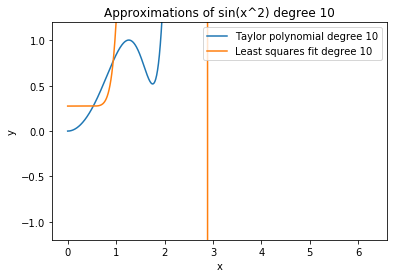

In [10]:
def taylor_plot(k):
    dom = np.linspace(0, 2*np.pi, 1000)
    x = sp.Symbol('x')
    eq = taylor(k)
    print(eq)
    EQ = sp.lambdify(x, eq)
    label = "Taylor polynomial degree %d" % k
    plt.plot(dom, EQ(dom), label=label)
    
    
    z = sp.Symbol('z')
    eq2 = fit(k)
    EQ2 = sp.lambdify(z, eq2)
    label2 = "Least squares fit degree %d" % k
    plt.plot(dom, EQ2(dom), label=label2)
    plt.legend()
    
    plt.title("Approximations of sin(x^2) degree %d" % k)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim(-1.2, 1.2)

taylor_plot(10)

## Problem 3

The _Belousov-Zhabotinsky reaction_ is a chemcial oscillator, a cocktail of chemicals which, when heated, undergoes a series of reactions that cause the chemical concentrations in the mixture to oscillate between two extremes. The following equations describe the evolution of the two concentrations in this chemical system:
$$
\frac{dx}{dt} = 1-(b+1)x+ax^2y\\
\frac{dy}{dt} = bx -ax^2y
$$
where $x$ and $y$ represent concentrations of two chemicals and $a$ and  $b$ are positive constants. 

Solve these equations (numerically) for $a=1$, $b=3$ with initial conditions $x=y=0$ and plot the solution. 

In [11]:
def dx_dy(x, t, a, b, dt):
    xx = x + dt*(1-(b+1)*x + a*x**2*y)
    yy = y + dt*(b*x - a*x**2*y)
    return xx, yy

In [12]:
a = 1
b = 3
x0 = 0 
y0 = 0

t = 0
dt = 0.01
tmax = 50
time = np.arange(t, tmax, dt)

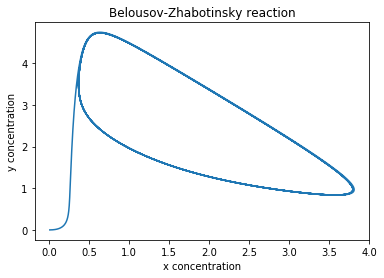

In [13]:
x = x0; x_values = []
y = y0; y_values = []
for ti in time:
    x, y = dx_dy(x, y, a, b, dt)
    x_values.append(x)
    y_values.append(y)
    
plt.plot(x_values, y_values)
plt.title("Belousov-Zhabotinsky reaction")
plt.xlabel("x concentration")
plt.ylabel("y concentration")

# Problem 4

In the `data` directory there is the text file `wdats.txt`. Copy this file into your `mp248/final` directory.   Each line of the file has a day of data for Victoria and Saskatoon.  The top line of the file explains the content of the remaining lines in the file.   In this problem we ask you to make a matplotlib interactive visualization of the data.

Use matplotlib `widgets` to control your interactive plot. Use a <a href="https://matplotlib.org/gallery/widgets/slider_demo.html">Slider</a> for the user to input the month as a number between 1 (January) and 12 (December).  Also have a <a href="https://matplotlib.org/gallery/widgets/radio_buttons.html">RadioButton</a> for the user to select between max, min and mean temperatures.

With the application running, when the user selects the month, and clicks on a radio button, the plot should update to show the temperatures for Victoria (horizontal axis) vs Saskatoon (vertical axis) for that month and with the convention chosen on the radio button.

This should be a properly interactive plot, that allows the user to dynamically change the month and radio button, with the plot automatically updating on every change.

If you find using the Slider or RadioButton feature difficult; rather than making an interactive plot, you could opt to make a callable function that takes two arguments: (1) the month as an integer between 1 and 12, and (2) a string 'Max', 'Min' or 'Mean'.  This function should then make the appropriate non-interactive Matplotlib plot, as described above.  Such an answer would receive (at best) a grade of 7/10.


In [14]:
from matplotlib.widgets import Slider, RadioButtons
%matplotlib nbagg

In [15]:
f = open('wdats.txt')
count = 0

date = []; vic_min=[]; vic_mean=[]; vic_max=[]; vic_precip=[]; sask_min=[]; sask_mean=[]; sask_max=[]; sask_precip=[]
for line in f:
    if count == 0: 
        count += 1
        continue
    count += 1
    # Date, Min (Vic), Mean (Vic), Max (Vic), Precip (Vic), Min (Sask), Mean (Sask), Max (Sask), Precip (Sask)
    d, v_min, v_mean, v_max, v_precip, s_min, s_mean, s_max, s_precip = line.split(',')
    date.append(d)
    vic_min.append(float(v_min))
    vic_mean.append(float(v_mean))
    vic_max.append(float(v_max))
    vic_precip.append(float(v_precip))
    sask_min.append(float(s_min))
    sask_mean.append(float(s_mean))
    sask_max.append(float(s_max))
    sask_precip.append(float(s_precip))
    
print(date[0], date[-1])
print(count)

1970-01-01 2017-07-31
15056


In [16]:
def get_month(date, vic_data, sask_data, month):
    month = int(month)
    new_vic_data = []
    new_saks_data = []
    for d, v, s in zip(date, vic_data, sask_data):
        m = int(d.split('-')[1])
        if month == m:
            new_vic_data.append(v)
            new_saks_data.append(s)
    return new_vic_data, new_saks_data

<IPython.core.display.Javascript object>


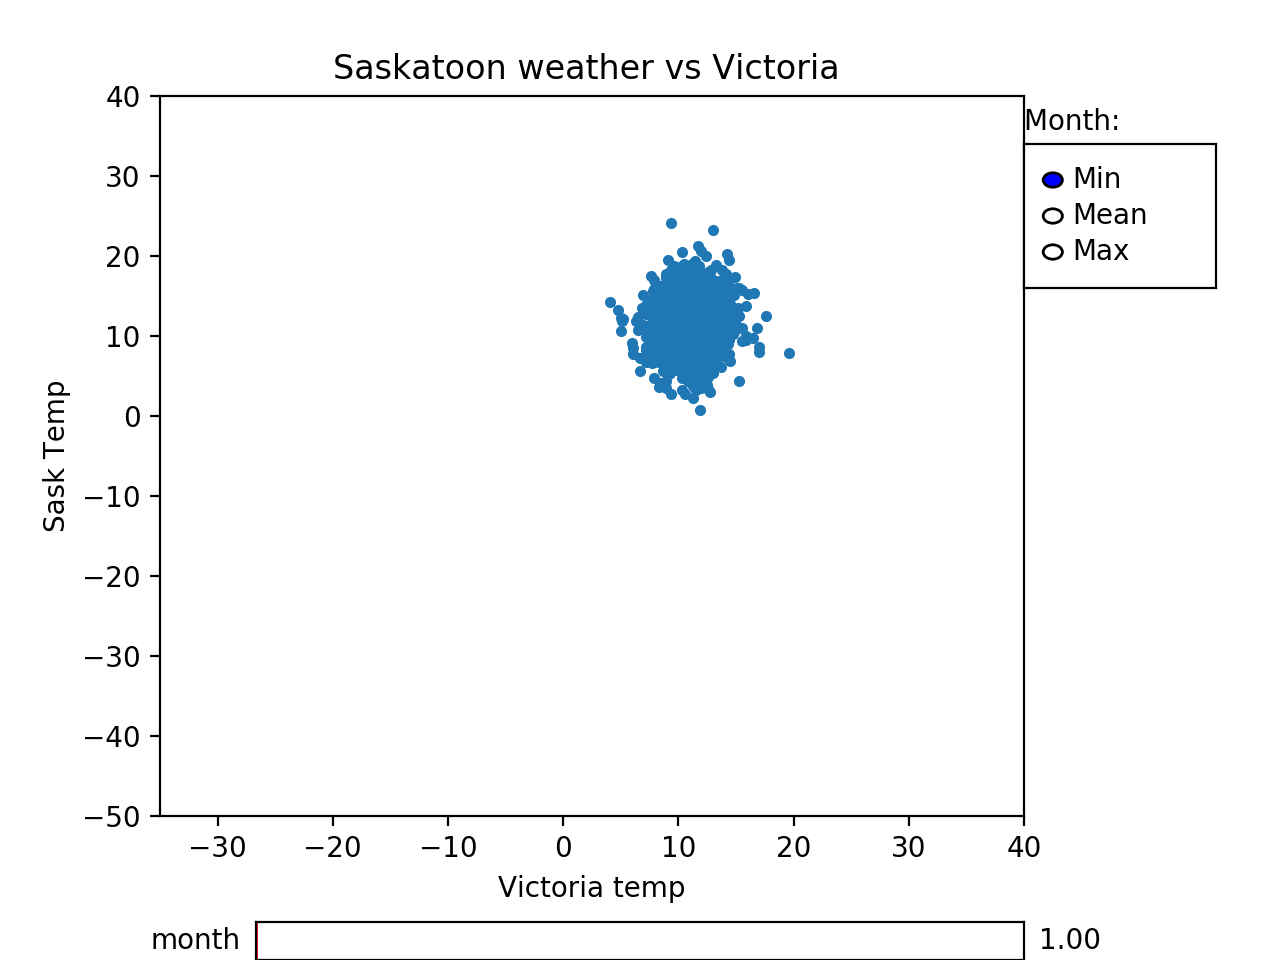

In [17]:
fig, ax = plt.subplots()
plt.subplots_adjust(right=0.8, top=.9, bottom=.15)

vic, sask = get_month(date, vic_min, sask_min, 7) 
data_plot, = plt.plot(vic, sask, '.')
plt.xlim(-35, 40)
plt.ylim(-50, 40)
ax.set_title('Saskatoon weather vs Victoria ')
ax.set_xlabel('Victoria temp')
ax.set_ylabel('Sask Temp')

axyear = plt.axes([0.2, 0.0, 0.6, 0.04])
month = Slider(axyear, 'month', 1, 12, valinit=1)

rax = plt.axes([0.8, 0.7, 0.15, 0.15])
radio = RadioButtons(rax, ('Min', 'Mean', 'Max'))

info = plt.text(0, 1.1, 'Month: ')

def update(val):
    if radio.value_selected == "Min":
        v = vic_min
        s = sask_min
    elif radio.value_selected == 'Max':
        v = vic_max
        s = sask_max
    elif radio.value_selected == "Mean":
        v = vic_mean
        s = sask_mean
        
    vic, sask = get_month(date, v, s, int(val)) 
    data_plot.set_xdata(vic)
    data_plot.set_ydata(sask)
    fig.canvas.draw_idle()
    info.set_text('Month: %d'%val)

def rad(label):
    update(month.val)
    
radio.on_clicked(rad)
month.on_changed(update)

plt.show()